In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from pyod.models.iforest import IForest
from pyod.models.dif import DIF 
from pyod.models.loda import LODA 

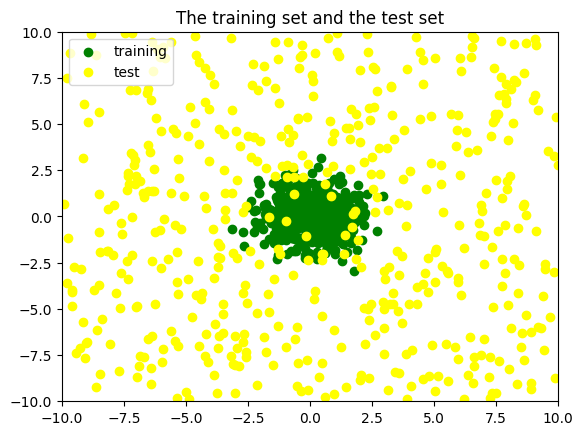

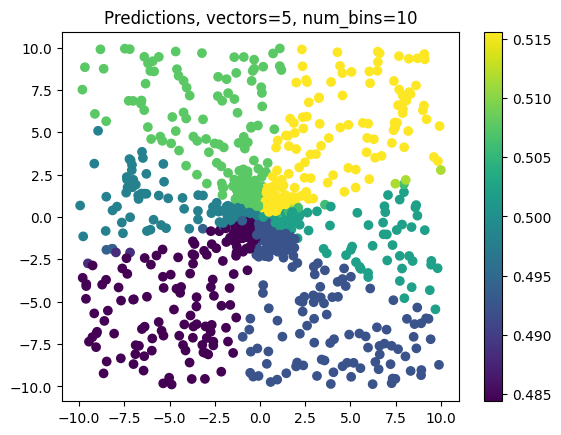

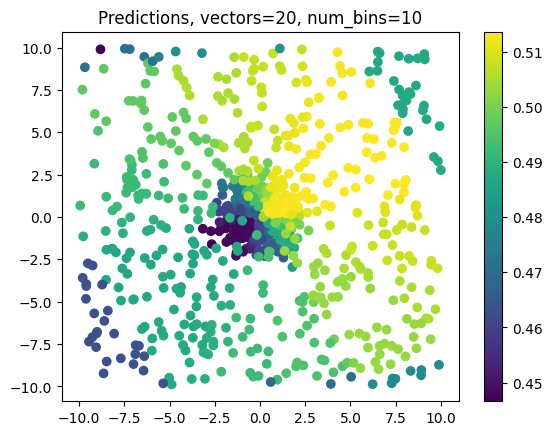

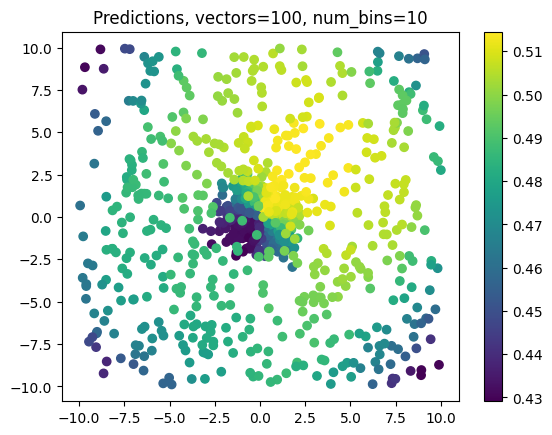

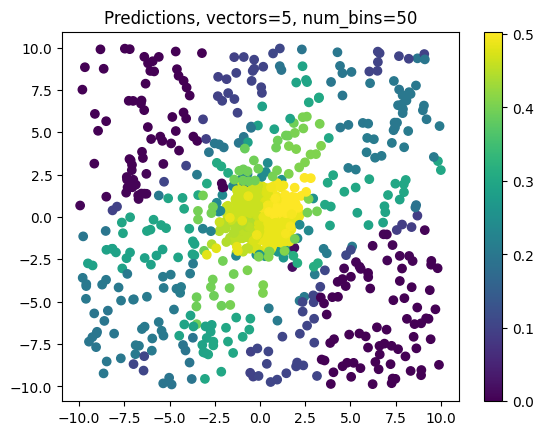

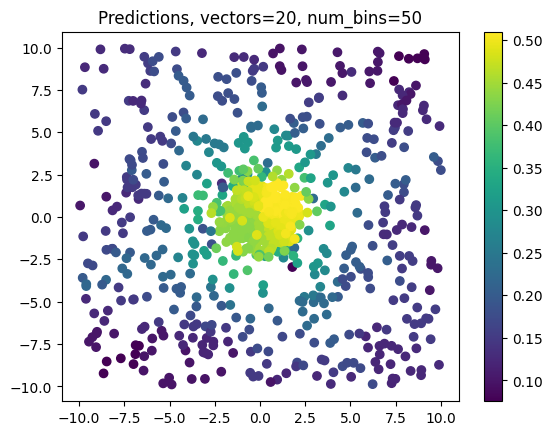

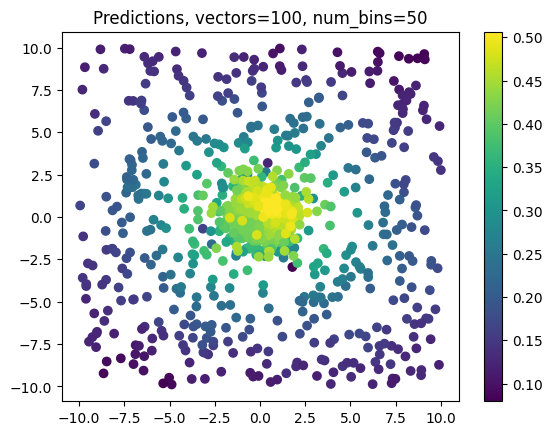

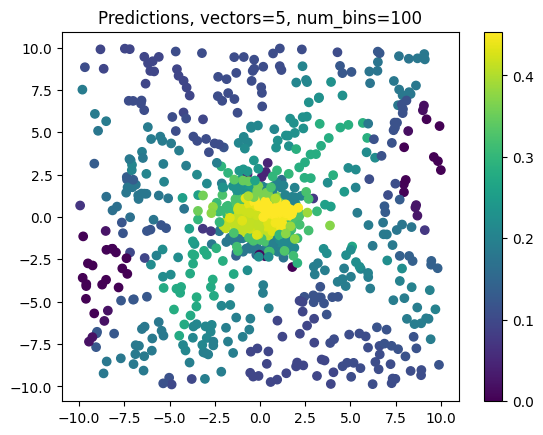

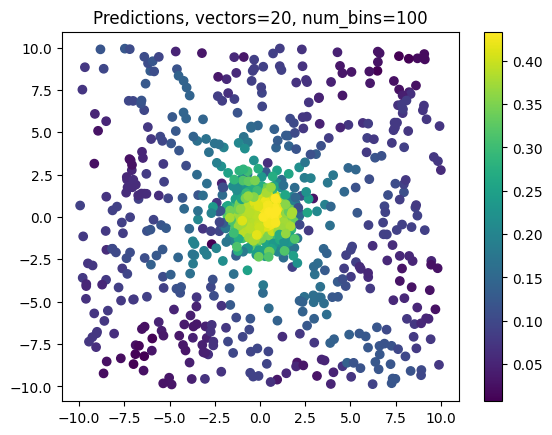

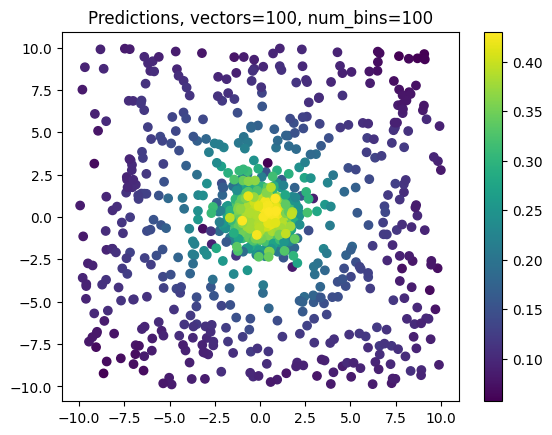

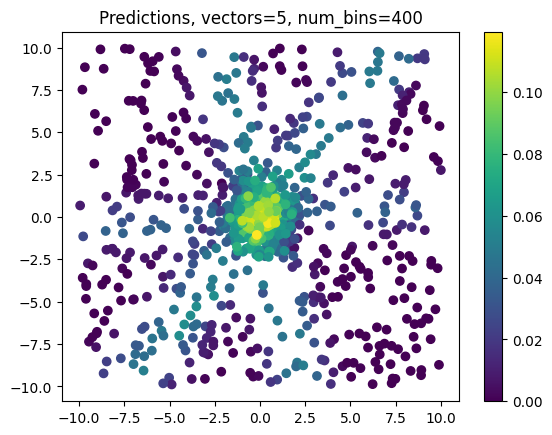

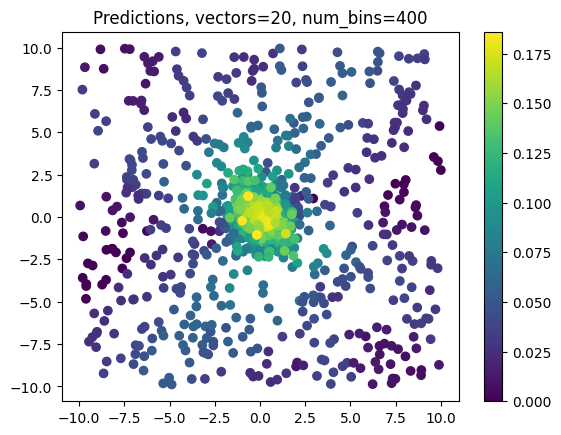

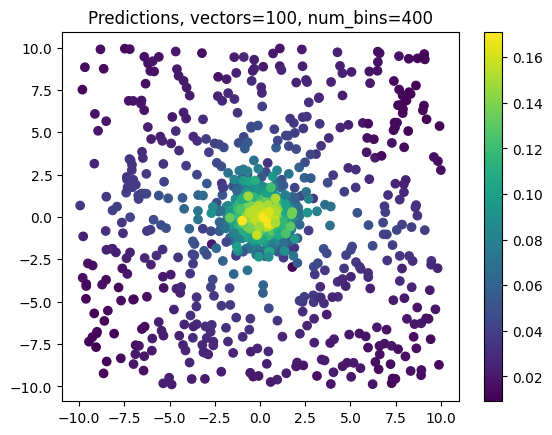

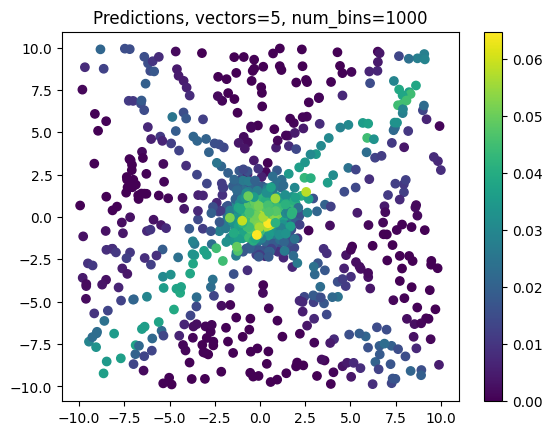

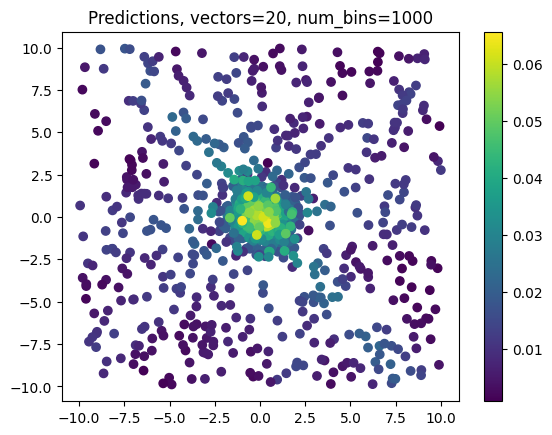

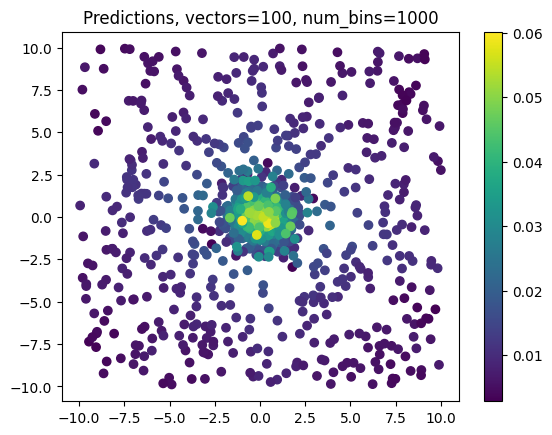

In [44]:
# Exercise 1.

# Returns the projection vectors and the histograms.
def compute_histograms(X, num_projection_vectors=5, num_bins=300):
    # Choosing the 5 projection vectors.
    projection_vectors = np.random.multivariate_normal(mean=(0,0), cov=np.array([[1,0],[0, 1]]), size=num_projection_vectors)

    # Computing the projections.
    projections = X @ projection_vectors.T

    # Generating the histograms.
    histograms = []

    # Generating the histograms.
    for index in range(num_projection_vectors):
        projections_for_vector = projections[:, index]
        histogram, bins = np.histogram(projections_for_vector, bins=num_bins, range=(-100, 100))

        # Normalize the histogram.
        histogram = histogram / len(X)
        
        histograms.append((histogram, bins))

    return (projection_vectors, histograms)


# Get the probability of a sample being an inlier.
def probability(x, simple_loda):
    projection_vectors, histograms = simple_loda

    total_probability = 0 
    
    for i, vector in enumerate(projection_vectors):
        projection = x @ vector.T

        histogram, bins = histograms[i]

        bin = np.digitize(projection, bins)
        
        if bin == 0 or bin == len(bins):
            continue
        
        total_probability += histogram[bin-1]

    total_probability /= len(histograms)

    return total_probability
     
# Generating the dataset.
X_train, _ = make_blobs(n_samples=500, n_features=2, centers=[(0, 0)])
X_test = np.random.uniform([-10, -10], [10, 10], size=(500, 2))

plt.title("The training set and the test set")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.scatter(X_train[:, 0], X_train[:, 1], c="green", label="training")
plt.scatter(X_test[:, 0], X_test[:, 1], c="yellow", label="test")
plt.legend()
plt.show()


parameters = [
    (5, 10),
    (20, 10),
    (100, 10),
    (5, 50),
    (20, 50),
    (100, 50),
    (5, 100),
    (20, 100),
    (100, 100),
    (5, 400),
    (20, 400),
    (100, 400),
    (5, 1000),
    (20, 1000),
    (100, 1000),
]

for num_projection_vectors, num_bins in parameters:
    simple_loda = compute_histograms(X_train, num_projection_vectors, num_bins)

    # Generating the predictions.
    probabilities_train = np.array([probability(x, simple_loda) for x in X_train])
    probabilities_test= np.array([probability(x, simple_loda) for x in X_test])

    plt.title(f"Predictions, vectors={num_projection_vectors}, num_bins={num_bins}")
    plt.scatter(X_train[:, 0], X_train[:, 1], c=probabilities_train)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=probabilities_test)
    plt.colorbar()
    plt.show()

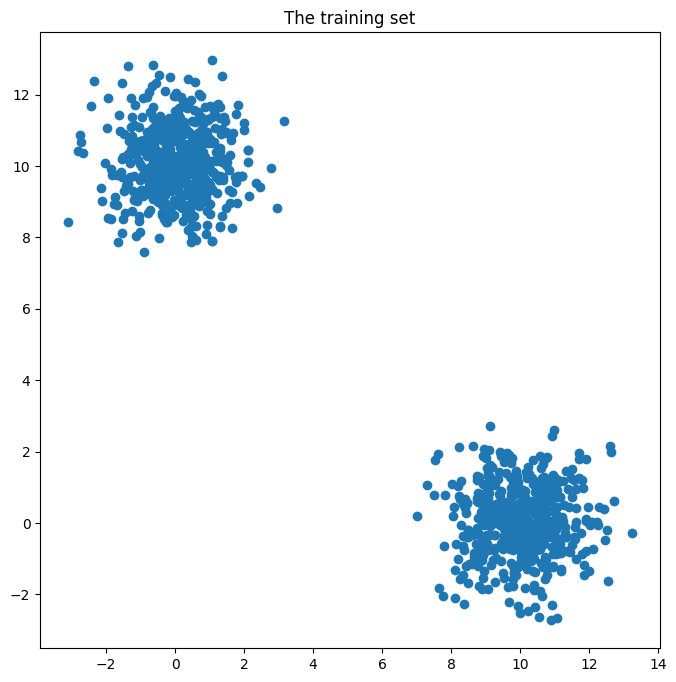

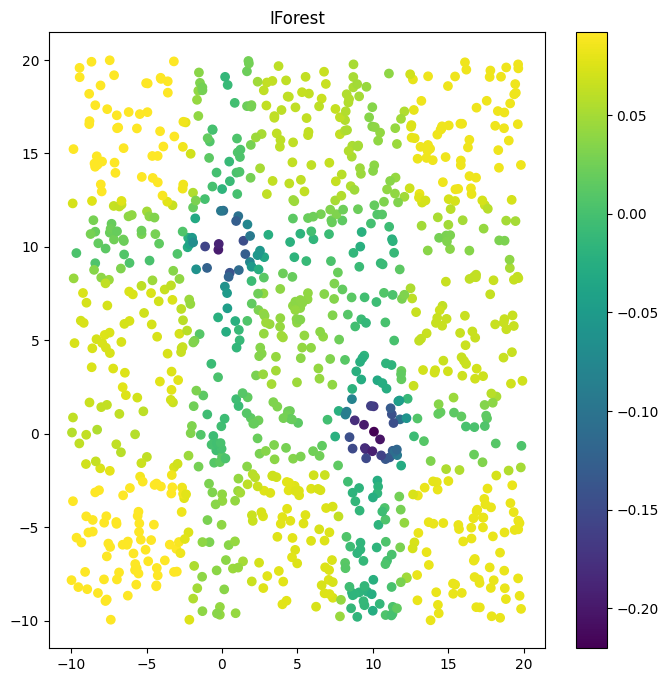

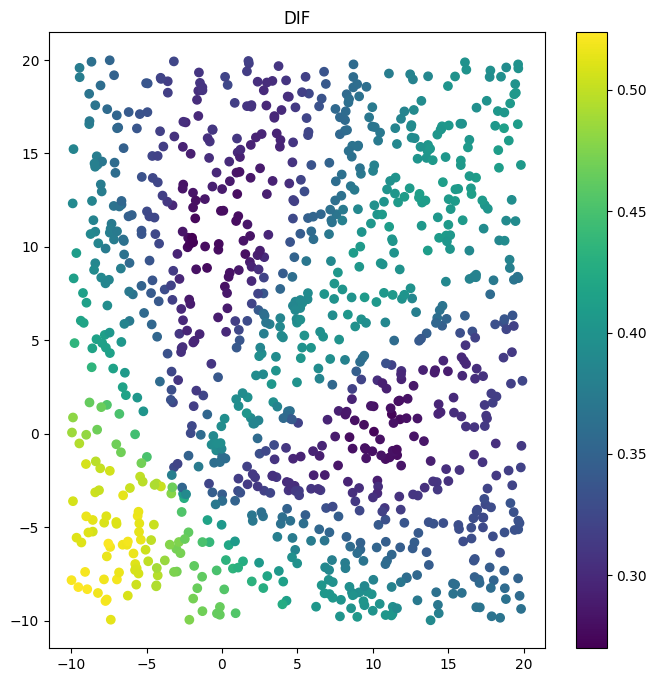

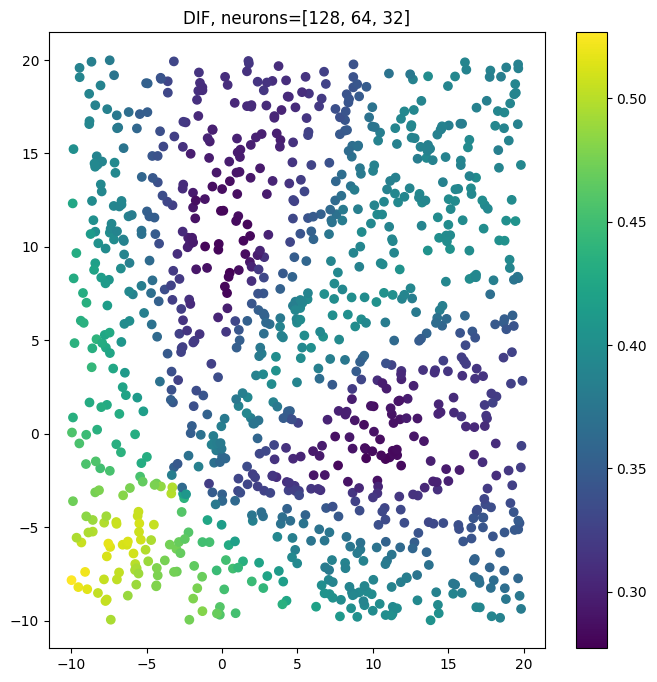

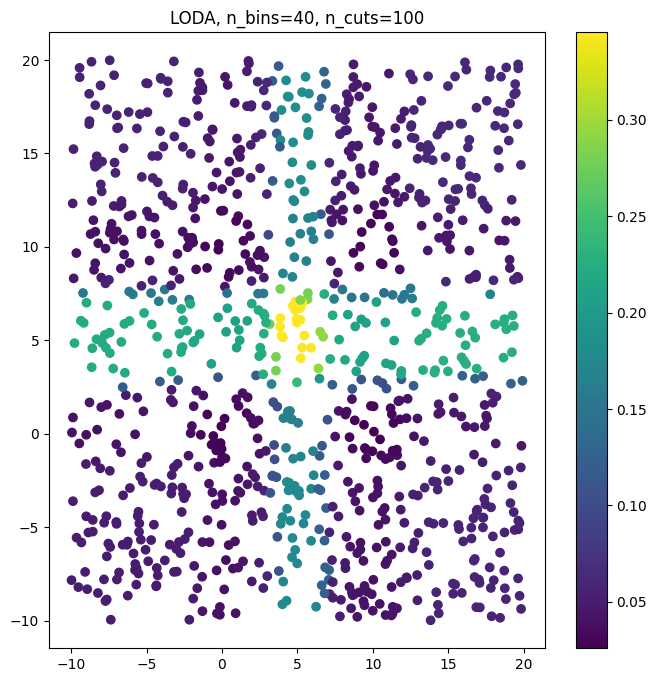

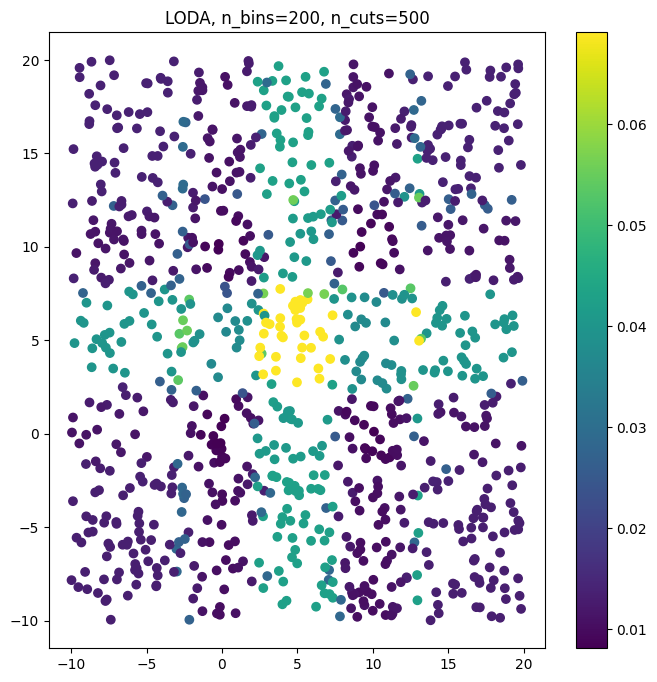

In [55]:
# Exercise 2 - 2D

plt.rcParams["figure.figsize"] = (8,8)

# Generating the data.
X_train, y_train = make_blobs(n_samples=[500,500], n_features=2, centers=[(10, 0), (0, 10)], cluster_std=[1, 1])
X_test = np.random.uniform([-10, -10], [20, 20], size=(1000, 2)) 
    
plt.title("The training set")
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.show()

# Fitting models.
contamination_rate = 0.02
models = [(IForest(contamination=contamination_rate), "IForest"),
          (DIF(contamination=contamination_rate), "DIF"), 
          (DIF(contamination=contamination_rate, hidden_neurons=[128, 64, 32]), "DIF, neurons=[128, 64, 32]"), 
          (LODA(contamination=contamination_rate, n_bins=40, n_random_cuts=100), "LODA, n_bins=40, n_cuts=100"),
          (LODA(contamination=contamination_rate, n_bins=200, n_random_cuts=500), "LODA, n_bins=200, n_cuts=500"),
]

for (i, (model, name)) in enumerate(models):
    model.fit(X_train)
    scores = model.decision_function(X_test)

    plt.title(name)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=scores)
    plt.colorbar()
    plt.show()

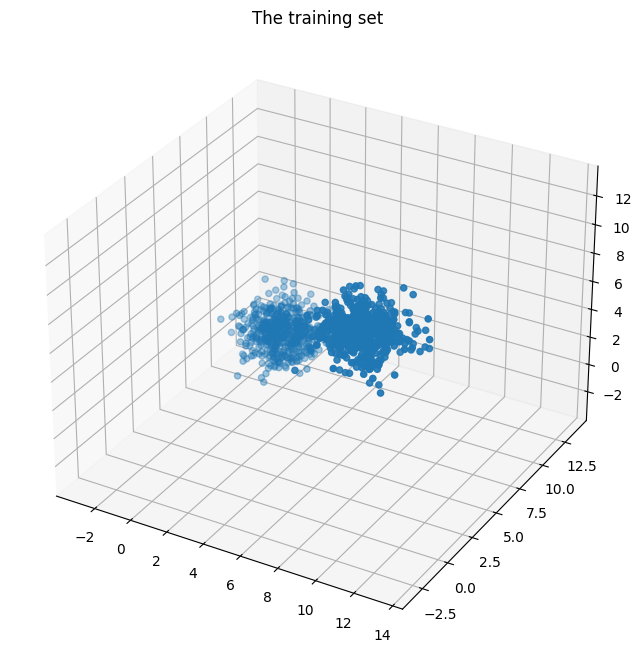

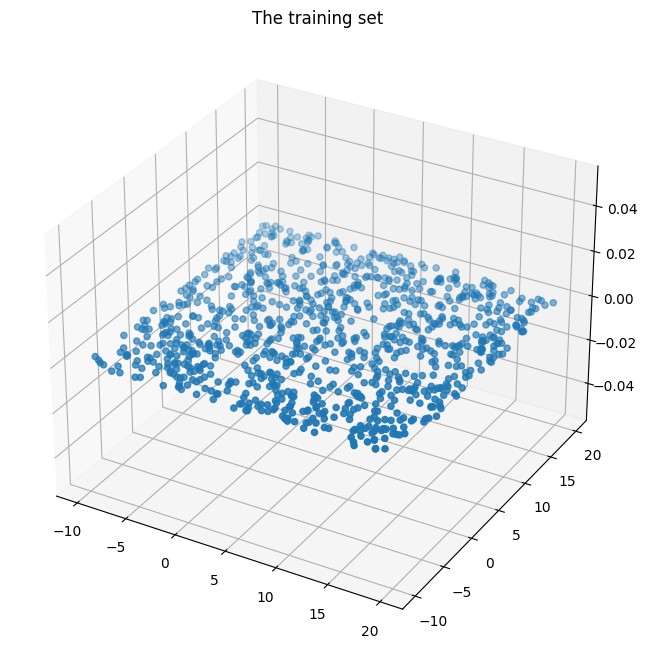

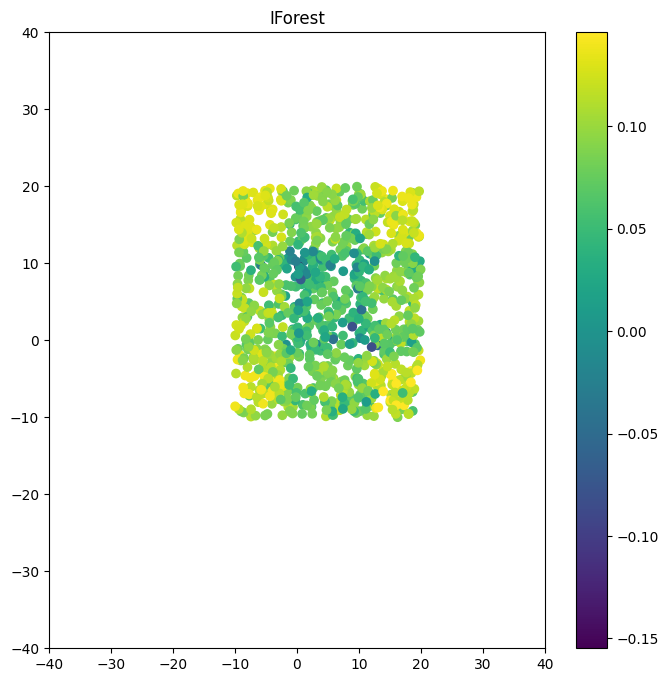

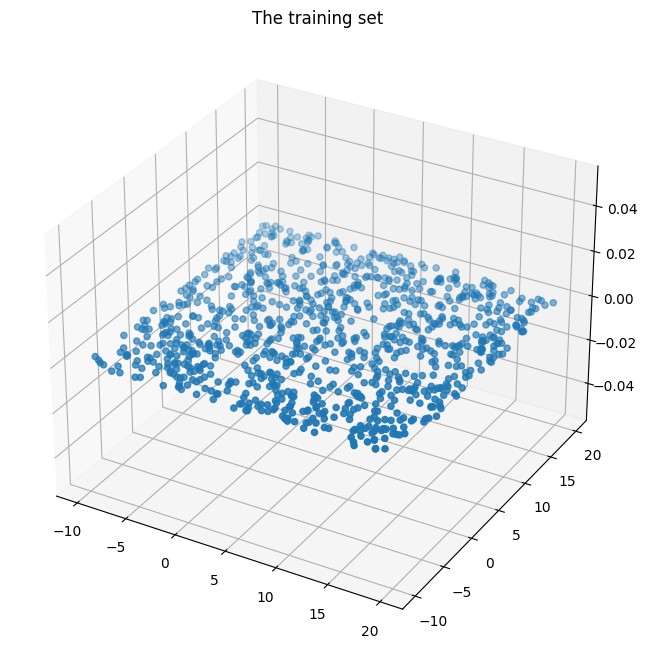

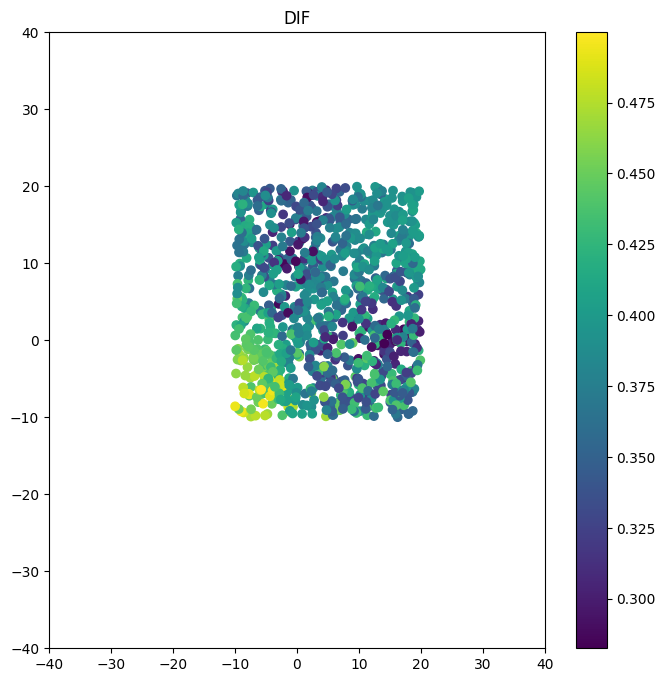

KeyboardInterrupt: 

In [56]:
# Exercise 2 - 3D

plt.rcParams["figure.figsize"] = (8,8)

# Generating the data.
X_train, y_train = make_blobs(n_samples=[500,500], n_features=3, centers=[(0, 10, 0), (10, 0, 10)], cluster_std=[1, 1])
X_test = np.random.uniform([-10, -10, -10], [20, 20, 20], size=(1000, 3)) 

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title("The training set")
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2])
plt.show()

# Fitting models.
contamination_rate = 0.02
models = [(IForest(contamination=contamination_rate), "IForest"),
          (DIF(contamination=contamination_rate), "DIF"), 
          (DIF(contamination=contamination_rate, hidden_neurons=[128, 64, 32]), "DIF, neurons=[128, 64, 32]"), 
          (LODA(contamination=contamination_rate, n_bins=40, n_random_cuts=100), "LODA, n_bins=40, n_cuts=100"),
          (LODA(contamination=contamination_rate, n_bins=200, n_random_cuts=500), "LODA, n_bins=200, n_cuts=500"),
]

for (i, (model, name)) in enumerate(models):
    model.fit(X_train)
    scores = model.decision_function(X_test)

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_title("The training set")
    ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=scores)
    plt.show()